<a href="https://colab.research.google.com/github/aayushkumar20/Kaggle-datasets-based-models/blob/main/Malicious%20URL%20identifier/malicious_URL_identifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tld
!pip install colorama

     |████████████████████████████████| 412 kB 4.3 MB/s 


# Installing important modules for proper functioning ⬆ #

In [47]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

# Importing all the required components from the required modules ⬆ #

In [4]:
data = pd.read_csv('/content/malicious_phish.csv')
data.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


# Reading the contents from the imported (csv) file provided by the Kaggle ⬆ #

In [5]:
data.isnull().sum()

url     0
type    1
dtype: int64

# Checking data types #

In [6]:
count = data.type.value_counts()
count

benign        221334
defacement     55984
phishing       18122
malware         7223
Name: type, dtype: int64

# Counting the numbers of phising, malware, etc types of links from the given csv files #

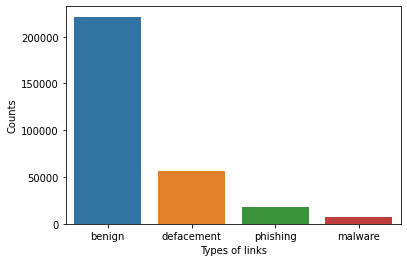

In [7]:
sns.barplot(x=count.index, y=count)
plt.xlabel('Types of links')
plt.ylabel('Counts');

# Representing the types of links based on their categories and types ⬆ #

In [8]:
data['url'] = data['url'].replace('www.', '', regex=True)
data

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
302659,amazon.com/Wish-Was-Heaven-Sitting-Down/dp/B00...,benign
302660,facebook.com/pages/Andy-Carey-Art/122559805272,benign
302661,rzim.org/,benign
302662,en.wikipedia.org/wiki/Ray_Daviault,benign


# Removing (WWW) from the given list and allowing only http:// #

# 👇 Algorithms for shorting and feature extractions #

In [9]:
rem = {"Category": {"benign": 0, "defacement": 1, "phishing":2, "malware":3}}
data['Category'] = data['type']
data = data.replace(rem)

In [10]:
data['url_len'] = data['url'].apply(lambda x: len(str(x)))

In [11]:
def process_tld(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain

In [12]:
data['domain'] = data['url'].apply(lambda i: process_tld(i))

In [13]:
data.head()

,url,type,Category,url_len,domain
0,br-icloud.com.br,phishing,2.0,16,br-icloud.com.br
1,mp3raid.com/music/krizz_kaliko.html,benign,0.0,35,mp3raid.com
2,bopsecrets.org/rexroth/cr/1.htm,benign,0.0,31,bopsecrets.org
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1.0,84,garage-pirenne.be
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1.0,235,adventure-nicaragua.net


# 👇 extracting number of feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//'] from given data set. #

In [14]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    data[a] = data['url'].apply(lambda i: i.count(a))

In [15]:
data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//
0,br-icloud.com.br,phishing,2.0,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0.0,35,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0.0,31,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1.0,84,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1.0,235,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1


In [16]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        return 1
    else:
        return 0

In [17]:
data['abnormal_url'] = data['url'].apply(lambda i: abnormal_url(i))

# ⬆ Sorting abmornal url and making graph for the data ⬇ #

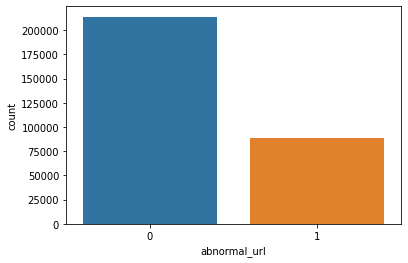

In [18]:
sns.countplot(x='abnormal_url', data=data);

# ⬇ searching for the URL pattern that are malicious in nature #

In [20]:
def httpSecure(url):
    htp = urlparse(url).scheme
    match = str(htp)
    if match=='https':
        return 1
    else:
        return 0

In [21]:
data['https'] = data['url'].apply(lambda i: httpSecure(i))

# ⬇ plotting plot for the secure URL #

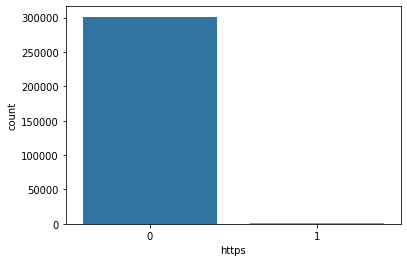

In [22]:
sns.countplot(x='https', data=data);

# ⬇ Colunting the number of number of charecter in the given URL #

In [25]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

In [26]:
data['digits']= data['url'].apply(lambda i: digit_count(i))

In [27]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

In [28]:
data['letters']= data['url'].apply(lambda i: letter_count(i))

In [29]:
data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https,digits,letters
0,br-icloud.com.br,phishing,2.0,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0.0,35,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0.0,31,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,25
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1.0,84,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1,1,0,7,60
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1.0,235,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1,1,0,22,199


# abnormal_url, https, digits, letters are shown in the end of the given table #

In [30]:
def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

# Checking for URL shortner #

In [31]:
data['Shortining_Service'] = data['url'].apply(lambda x: Shortining_Service(x))

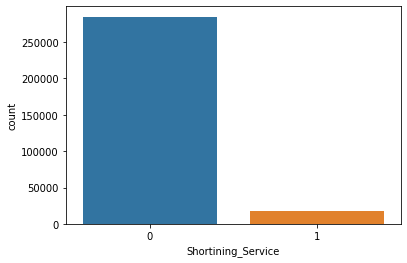

In [33]:
sns.countplot(x='Shortining_Service', data=data);

# Checking for IP Address #

In [34]:
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

In [38]:
data['having_ip_address'] = data['url'].apply(lambda i: having_ip_address(i))

In [39]:
data["having_ip_address"].value_counts()

0    302470
1       194
Name: having_ip_address, dtype: int64

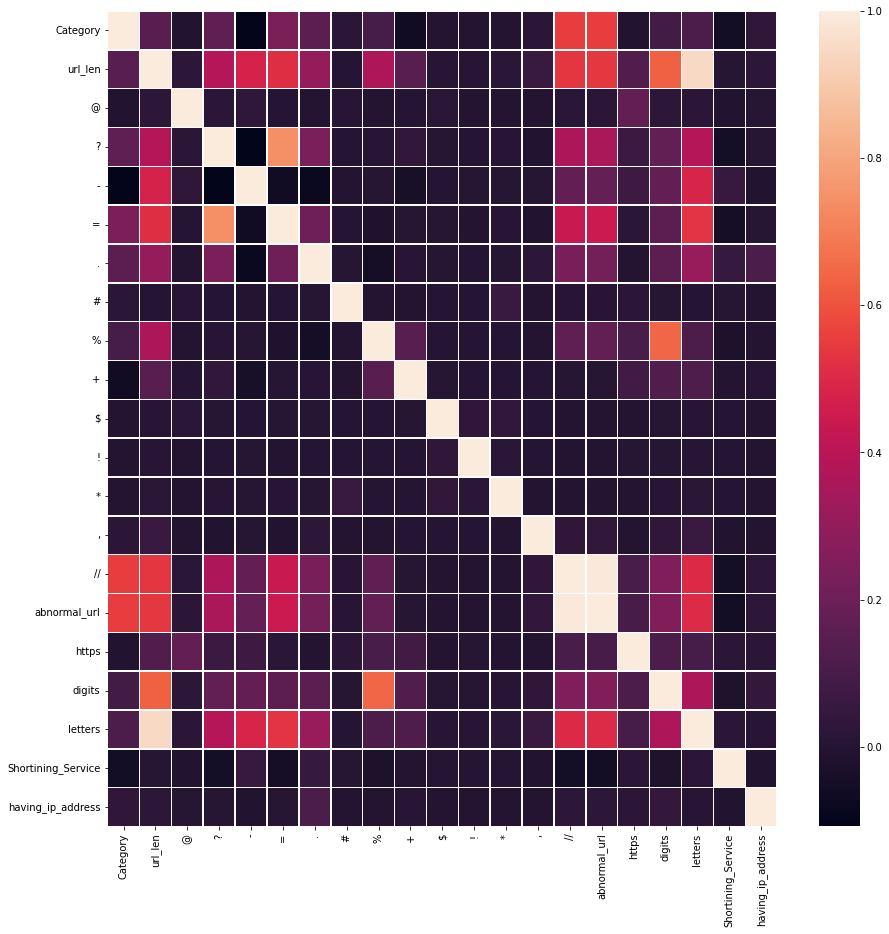

In [42]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), linewidths=.5)

In [44]:
X = data.drop(['url','type','Category','domain'],axis=1)
y = data['Category']

# Training the model for realtime use #

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
models = [DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,KNeighborsClassifier,SGDClassifier,
         ExtraTreesClassifier,GaussianNB]
accuracy_test=[]
for m in models:
    model_ = m()
    model_.fit(X_train, y_train)
    pred = model_.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    cf_matrix = confusion_matrix(y_test, pred)
    plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    plt.show()

In [ ]:
output = pd.DataFrame({"Model":['Decision Tree Classifier','Random Forest Classifier',
                                'AdaBoost Classifier','KNeighbors Classifier','SGD Classifier',
                                'Extra Trees Classifier','Gaussian NB'],
                      "Accuracy":accuracy_test})

In [ ]:
plt.figure(figsize=(10, 5))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=20);
plt.ylabel("Accuracy", size=14)
plt.show()